In [1]:
%matplotlib inline


import numpy as np
import pandas as pd
from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor, export_graphviz


from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, make_scorer
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
# Load Train dataset
df = pd.read_excel("../data/_pasifik_sales_portfoy.xlsx")

In [5]:
df = reduce_mem_usage(df)
df.head(5).append(df.tail(5))

Mem. usage decreased to  5.84 Mb (62.2% reduction)


,yil,ay,grup_adi,ana_kategori_adi,kategori_adi,marka_adi,urun_adi,en_guncel_kod,koli_i̇ci_adet,koli,...,lockdown,satis_var,fiyat,fiyat_gecisi,raf_tavsiye_satis_fiyati,i̇ndirimli_raf_satis_fiyati,aktivite_tipi,indirim__,enflasyon_etkisi,yarisma
0,2017,3,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216,144.0,...,0,1,639.500000,0.0,NaN,NaN,NaN,NaN,11.289062,0
1,2017,4,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216,182.0,...,0,1,677.500000,1.0,NaN,NaN,NaN,NaN,11.867188,0
2,2017,5,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216,18.0,...,0,1,680.500000,0.0,NaN,NaN,NaN,NaN,11.718750,0
3,2017,6,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216,47.0,...,0,1,680.500000,0.0,NaN,NaN,NaN,NaN,10.898438,0
4,2017,7,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216,8.0,...,0,1,680.500000,1.0,NaN,NaN,NaN,NaN,9.789062,0
49389,2020,11,Diğer_Pasifik,ATIŞTIRMALIK,BİSKÜVİ,ÜLKER BEBE,ULK BEBE TAHILLI PROMO 30Gx20,3606,20,3500.0,...,0,1,8.601562,0.0,NaN,NaN,NaN,NaN,14.031250,0
49390,2020,12,Diğer_Pasifik,ATIŞTIRMALIK,BİSKÜVİ,ÜLKER BEBE,ULK BEBE TAHILLI PROMO 30Gx20,3606,0,0.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,14.601562,0
49391,2021,1,Diğer_Pasifik,ATIŞTIRMALIK,BİSKÜVİ,ÜLKER BEBE,ULK BEBE TAHILLI PROMO 30Gx20,3606,0,0.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,14.968750,0
49392,2021,2,Diğer_Pasifik,ATIŞTIRMALIK,BİSKÜVİ,ÜLKER BEBE,ULK BEBE TAHILLI PROMO 30Gx20,3606,0,0.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15.609375,0
49393,2021,3,Diğer_Pasifik,ATIŞTIRMALIK,BİSKÜVİ,ÜLKER BEBE,ULK BEBE TAHILLI PROMO 30Gx20,3606,0,0.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,16.187500,0


In [6]:
df.shape

(49394, 41)

In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

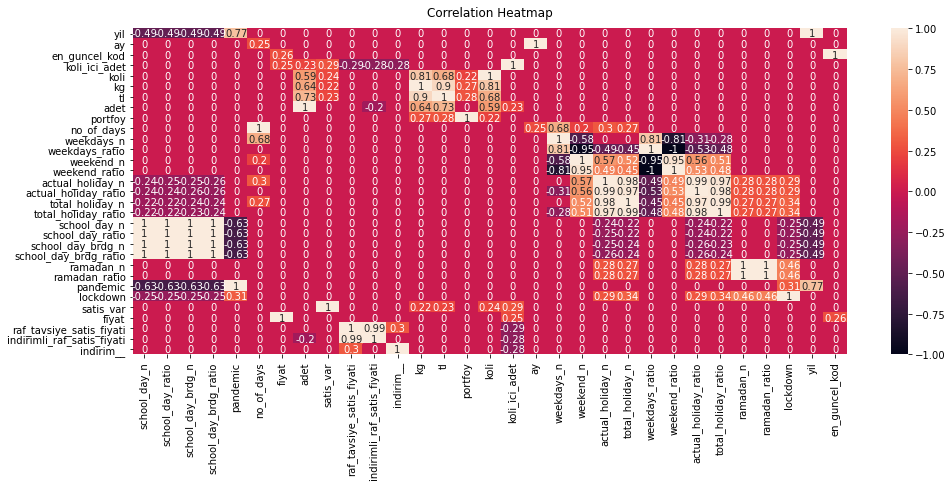

In [11]:
heatmap_corr(df.corr(),threshold=0.2)

In [30]:
train = df.copy()

In [31]:
train2 = train.copy()
train2.head()

,yil,ay,grup_adi,ana_kategori_adi,kategori_adi,marka_adi,urun_adi,en_guncel_kod,koli_i̇ci_adet,koli,...,lockdown,satis_var,fiyat,fiyat_gecisi,raf_tavsiye_satis_fiyati,i̇ndirimli_raf_satis_fiyati,aktivite_tipi,indirim__,enflasyon_etkisi,yarisma
0,2017,3,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216,144.0,...,0,1,639.5,0.0,NaN,NaN,NaN,NaN,11.289062,0
1,2017,4,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216,182.0,...,0,1,677.5,1.0,NaN,NaN,NaN,NaN,11.867188,0
2,2017,5,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216,18.0,...,0,1,680.5,0.0,NaN,NaN,NaN,NaN,11.718750,0
3,2017,6,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216,47.0,...,0,1,680.5,0.0,NaN,NaN,NaN,NaN,10.898438,0
4,2017,7,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216,8.0,...,0,1,680.5,1.0,NaN,NaN,NaN,NaN,9.789062,0


In [32]:
train2.shape

(49394, 41)

In [33]:
train2 = train2[train2["portfoy"] == 1].reset_index(drop=True)

In [34]:
train2.columns

Index(['yil', 'ay', 'grup_adi', 'ana_kategori_adi', 'kategori_adi',
       'marka_adi', 'urun_adi', 'en_guncel_kod', 'koli_i̇ci_adet', 'koli',
       'kg', 'tl', 'adet', 'date', 'portfoy', 'no_of_days', 'weekdays_n',
       'weekdays_ratio', 'weekend_n', 'weekend_ratio', 'actual_holiday_n',
       'actual_holiday_ratio', 'total_holiday_n', 'total_holiday_ratio',
       'school_day_n', 'school_day_ratio', 'school_day_brdg_n',
       'school_day_brdg_ratio', 'ramadan_n', 'ramadan_ratio', 'pandemic',
       'lockdown', 'satis_var', 'fiyat', 'fiyat_gecisi',
       'raf_tavsiye_satis_fiyati', 'i̇ndirimli_raf_satis_fiyati',
       'aktivite_tipi', 'indirim__', 'enflasyon_etkisi', 'yarisma'],
      dtype='object')

In [35]:
drop_columns = ['koli_i̇ci_adet', 'koli', 'kg', 'tl', 'date', 'weekdays_n',
                'weekend_n', 'actual_holiday_n', 'total_holiday_n', 'school_day_n',
                'school_day_brdg_n', 'school_day_brdg_ratio', 'ramadan_n', 'raf_tavsiye_satis_fiyati', 
                'i̇ndirimli_raf_satis_fiyati', 'portfoy', "yarisma"]

In [37]:
train2 = train2.drop(columns=drop_columns)
train2.shape

(14019, 24)

In [38]:
train2.columns

Index(['yil', 'ay', 'grup_adi', 'ana_kategori_adi', 'kategori_adi',
       'marka_adi', 'urun_adi', 'en_guncel_kod', 'adet', 'no_of_days',
       'weekdays_ratio', 'weekend_ratio', 'actual_holiday_ratio',
       'total_holiday_ratio', 'school_day_ratio', 'ramadan_ratio', 'pandemic',
       'lockdown', 'satis_var', 'fiyat', 'fiyat_gecisi', 'aktivite_tipi',
       'indirim__', 'enflasyon_etkisi'],
      dtype='object')

count    1.401900e+04
mean     2.385099e+05
std      6.342901e+05
min      1.000000e+00
25%      8.400000e+03
50%      5.068800e+04
75%      1.780050e+05
max      1.126094e+07
Name: adet, dtype: float64


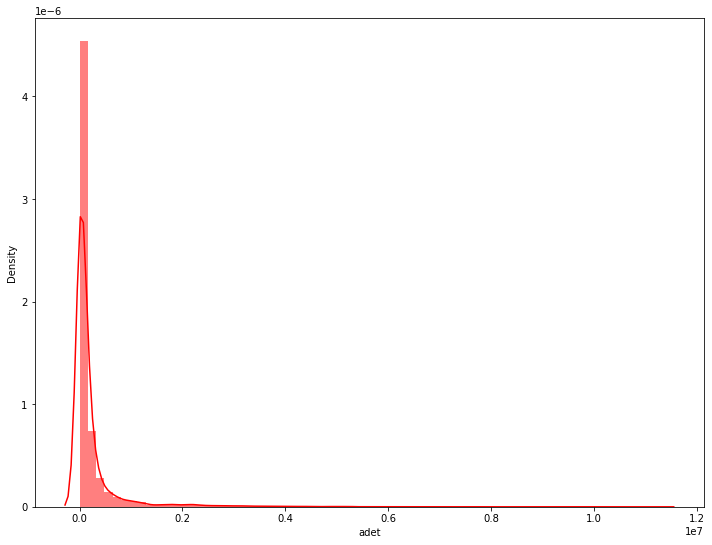

In [39]:
print(train2['adet'].describe())
plt.figure(figsize=(12, 9))
sns.distplot(train2['adet'], color='r', bins=70, hist_kws={'alpha': 0.5});

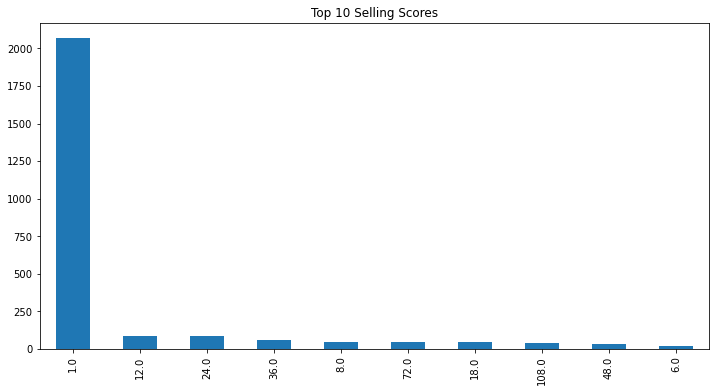

In [40]:
# Top 10 High Scored House
plot = train2.adet.value_counts().nlargest(10).plot(kind='bar', title="Top 10 Selling Scores", figsize=(12,6))

In [41]:
# Replace Numpy Nan values with 0 and 'nan'
for col in train2[train2.columns]:
  train2[col].fillna(value=0, inplace=True)

In [42]:
grpd = train2.groupby(["en_guncel_kod", "grup_adi"]).count().reset_index()

In [43]:
non_null = train2[train2["adet"] > 1].reset_index(drop=True)
non_null = non_null.groupby(["en_guncel_kod", "grup_adi"]).count().reset_index()

In [44]:
grpd.head()

,en_guncel_kod,grup_adi,yil,ay,ana_kategori_adi,kategori_adi,marka_adi,urun_adi,adet,no_of_days,...,school_day_ratio,ramadan_ratio,pandemic,lockdown,satis_var,fiyat,fiyat_gecisi,aktivite_tipi,indirim__,enflasyon_etkisi
0,3401,A101,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
1,3401,BİM,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
2,3401,Diğer_Pasifik,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
3,5606,A101,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
4,7200,A101,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [45]:
non_null.head()

,en_guncel_kod,grup_adi,yil,ay,ana_kategori_adi,kategori_adi,marka_adi,urun_adi,adet,no_of_days,...,school_day_ratio,ramadan_ratio,pandemic,lockdown,satis_var,fiyat,fiyat_gecisi,aktivite_tipi,indirim__,enflasyon_etkisi
0,3401,A101,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1,3401,BİM,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
2,3401,Diğer_Pasifik,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
3,5606,A101,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
4,7200,A101,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


In [48]:
train2.grup_adi.unique()

array(['Diğer_Pasifik', 'MİGROS', 'ŞOK', 'A101', 'BİM'], dtype=object)

In [50]:
df_bim = train2[train2.grup_adi == 'BİM'].copy()
df_diger = train2[train2.grup_adi == 'Diğer_Pasifik'].copy()
df_a101 = train2[train2.grup_adi == 'A101'].copy()
df_migros = train2[train2.grup_adi == 'MİGROS'].copy()
df_sok = train2[train2.grup_adi == 'ŞOK'].copy()

In [51]:
df_bim.shape, df_diger.shape, df_a101.shape, df_migros.shape, df_sok.shape

((1216, 24), (3739, 24), (2036, 24), (3558, 24), (3470, 24))

In [52]:
groups = [df_bim.shape[0], df_diger.shape[0], df_a101.shape[0], df_migros.shape[0], df_sok.shape[0]]

In [53]:
np.max(groups), np.min(groups)

(3739, 1216)

# Portföy Filtrelemesi

In [56]:
df_migros = df_migros[df_migros["adet"] != 1]

In [57]:
migros_y = df_migros.adet

In [60]:
df_migros["marka_adi"].unique()

array(['ÜLKER', 'ÇOKOPRENS', 'KREMİNİ', 'DİDO', 'LAVİVA',
       'ÜLKER ÇİKOLATALI GOFRET', 'CARAMIO', 'ALBENİ', 'ONEO', 'ÇOKONAT',
       'YUPO', 'COCOSTAR', 'ÇOKOKREM', 'ALTINBAŞAK', 'HOBBY', 'METRO',
       'HALLEY', 'DANKEK', "O'LALA", 'ÇİZİ', 'İKRAM', 'PROBİS',
       'ÜLKER PÖTİBÖR', 'ÜLKER KREMALI SANDVİÇ', '9 KAT TAT',
       'DANKEK RULO PASTA', 'ÜLKER BEBE', 'BİSKREM', 'ÜLKER GOFRET',
       'RULOKAT', 'DANKEK LOKMALIK', 'HANIMELLER', 'SMARTT', 'CİCİ',
       'KEKSTRA', 'ÜLKER ÇUBUK KRAKER', 'DANKEK PÖTİ'], dtype=object)

In [ ]:
df_migros.gropby()

In [321]:
marka_adi_dict = {'ÜLKER BEBE' :1, 'ÇOKOKREM' :2, 'PROBİS':3, 'ÇOKOPRENS' :4, 'HAYLAYF': 5, 'DORE': 6,
       'SAKLIKÖY': 7, 'ÇİZİ': 8, 'TEMPO': 9, 'ÜLKER PÖTİBÖR': 10, 'HANIMELLER': 11,
       'ALTINBAŞAK': 12, 'RONDO': 13, 'BİSKREM':14, 'ÜLKER FİNGER':15,
       'ÜLKER ÇUBUK KRAKER': 16, 'ÜLKER ÇİKOLATALI GOFRET': 17, 'SMARTT': 18, 'ÜLKER': 19,
       'ÜLKER SUSAMLI ÇUBUK': 20, 'HOBBY': 21, 'COCOSTAR': 22, 'DİDO': 23, 'ALBENİ': 24,
       'METRO': 25, 'HALLEY': 26, 'MCVITIES DIGESTIVE': 27, 'PİKO': 28, 'GODIVA':29,
       'ÜLKER GOFRET':30, 'ÜLKER ÇOKOMİLK': 31, 'KREMİNİ':32, 'BONBON': 33, 'CİCİ': 34,
       '8 KEK': 35, 'DANKEK LOKMALIK': 36, 'LAVİVA':37, 'ALPELLA':38, "O'LALA": 39,
       'DANKEK RULO PASTA': 40, 'KEKSTRA': 41, 'DANKEK BATON': 42, 'ÇOKONAT': 43,
       'DANKEK PÖTİ': 44, '9 KAT TAT': 45, 'RULOKAT':46, 'CANPARE': 47, 'ALPELLA 3GEN': 48,
       'DANKEK': 49, 'İKRAM':50, 'KRİSPİ': 51, 'ÜLKER KREMALI SANDVİÇ': 52, 'ÇOKOMEL' : 53,
       'CARAMIO': 54, 'ÜLKER GOLDEN': 55, 'YUPO': 56, 'ONEO': 57, 'ÜLKER PASTİL':58,
       'TAÇ KRAKER': 59, 'MAVİ YEŞİL':60, 'SPECIAL K': 61    
}

In [322]:
aktivite_tipi_dict = {'Mağaza içi/Dağılım': 1,
                  'Mutluluk': 2,
                  'Çoklu Alım': 3,
                  'İn&out': 4}

In [323]:
df_migros.replace({"aktivite_tipi":aktivite_tipi_dict}, inplace=True)

In [324]:
df_migros.replace({"marka_adi":marka_adi_dict}, inplace=True)

In [325]:
df_migros.drop("en_guncel_kod", axis=1, inplace=True)

In [326]:
get_dummy_columns = ['ana_kategori_adi', 'kategori_adi']

In [327]:
for index in get_dummy_columns:
    df_migros[index] = df_migros[index].str.lower()
    df_migros[index] = df_migros[index].replace('ş', 's', regex=True)
    df_migros[index] = df_migros[index].replace(' ', '_', regex=True)

In [328]:
for index in get_dummy_columns_numeric:
    df_migros[index] = df_migros[index].replace('ş', 's', regex=True)
    df_migros[index] = df_migros[index].replace(' ', '_', regex=True)

In [329]:
for index in get_dummy_columns:
    df_migros = pd.concat([df_migros.drop(index, axis=1), pd.get_dummies(df_migros[index], prefix=index)], axis=1)
    df_migros.shape

In [330]:
num_range = [np.random.randint (1,360) for i in range(0,360)]

In [331]:
from numpy.random import default_rng

rng = default_rng()
numbers = rng.choice(360, size=360, replace=False)

In [332]:
product_list = df_migros.urun_adi.unique()

In [333]:
urun_adi_dict = dict(zip(product_list, numbers))

In [334]:
df_migros.replace({"urun_adi":urun_adi_dict}, inplace=True)

In [335]:
df_migros.head()

,yil,ay,grup_adi,marka_adi,urun_adi,adet,portfoy,no_of_days,weekdays_ratio,weekend_ratio,...,ana_kategori_adi_yardimci_katki_malzeme,kategori_adi_bi̇sküvi̇,kategori_adi_gofret,kategori_adi_kek,kategori_adi_krem_çi̇kolata/ezme,kategori_adi_pastacilik_ürünü,kategori_adi_sakiz,kategori_adi_seker,kategori_adi_çi̇kolata,kategori_adi_çi̇kolata_kaplama
885,2017,1,MİGROS,3,127,90648.0,1,31,0.709473,0.290283,...,0,1,0,0,0,0,0,0,0,0
886,2017,2,MİGROS,3,127,8628.0,1,28,0.714355,0.285645,...,0,1,0,0,0,0,0,0,0,0
887,2017,3,MİGROS,3,127,38436.0,1,31,0.741699,0.258057,...,0,1,0,0,0,0,0,0,0,0
888,2017,4,MİGROS,3,127,27528.0,1,30,0.666504,0.333252,...,0,1,0,0,0,0,0,0,0,0
889,2017,5,MİGROS,3,127,36216.0,1,31,0.741699,0.258057,...,0,1,0,0,0,0,0,0,0,0


In [336]:
df_migros = df_migros.drop(columns = 'grup_adi')
df_migros.head()

,yil,ay,marka_adi,urun_adi,adet,portfoy,no_of_days,weekdays_ratio,weekend_ratio,actual_holiday_ratio,...,ana_kategori_adi_yardimci_katki_malzeme,kategori_adi_bi̇sküvi̇,kategori_adi_gofret,kategori_adi_kek,kategori_adi_krem_çi̇kolata/ezme,kategori_adi_pastacilik_ürünü,kategori_adi_sakiz,kategori_adi_seker,kategori_adi_çi̇kolata,kategori_adi_çi̇kolata_kaplama
885,2017,1,3,127,90648.0,1,31,0.709473,0.290283,0.290283,...,0,1,0,0,0,0,0,0,0,0
886,2017,2,3,127,8628.0,1,28,0.714355,0.285645,0.285645,...,0,1,0,0,0,0,0,0,0,0
887,2017,3,3,127,38436.0,1,31,0.741699,0.258057,0.258057,...,0,1,0,0,0,0,0,0,0,0
888,2017,4,3,127,27528.0,1,30,0.666504,0.333252,0.333252,...,0,1,0,0,0,0,0,0,0,0
889,2017,5,3,127,36216.0,1,31,0.741699,0.258057,0.322510,...,0,1,0,0,0,0,0,0,0,0


In [337]:
migros_y.shape

(3444,)

In [338]:
df_migros.shape

(3444, 32)

In [339]:
df_migros["aktivite_tipi"].value_counts()

Yok    2940
1       437
2        52
3        15
Name: aktivite_tipi, dtype: int64

In [340]:
df_migros.replace("Yok", 0, inplace=True)

In [341]:
from sklearn.preprocessing import StandardScaler

In [342]:
sc_x = StandardScaler()
sc_x.fit_transform(np.array(df_migros.drop("adet", axis=1)))

#sc_y = StandardScaler()
#sc_y.fit_transform(np.array(df_migros["adet"]).reshape(1, -1))

array([[-1.39908292, -1.48533124, -1.50372589, ..., -0.31728716,
        -0.43121968, -0.46901892],
       [-1.39908292, -1.20142177, -1.50372589, ..., -0.31728716,
        -0.43121968, -0.46901892],
       [-1.39908292, -0.9175123 , -1.50372589, ..., -0.31728716,
        -0.43121968, -0.46901892],
       ...,
       [ 1.80360341, -1.48533124,  1.4742307 , ..., -0.31728716,
        -0.43121968, -0.46901892],
       [ 1.80360341, -1.20142177,  1.4742307 , ..., -0.31728716,
        -0.43121968, -0.46901892],
       [ 1.80360341, -0.9175123 ,  1.4742307 , ..., -0.31728716,
        -0.43121968, -0.46901892]])

In [343]:
x = sc_x.fit_transform(np.array(df_migros.drop("adet", axis=1)).reshape(-1, 1))

In [415]:
df_migros_backup = df_migros.copy()

In [417]:
df_migros.drop("school_day_brdg_ratio", axis=1, inplace=True)
df_migros.drop("portfoy", axis=1, inplace=True)

In [418]:
df_migros.drop("fiyat", axis=1, inplace=True)

In [419]:
df_migros.drop("aktivite_tipi", axis=1, inplace=True)

In [420]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

In [421]:
migros_X_train_and_validate, migros_X_test, migros_y_train_and_validate, migros_y_test = train_test_split(
    df_migros, migros_y, test_size=0.25, random_state=1)

In [422]:
print("migros_X_train_and_validate shape is",  migros_X_train_and_validate.shape)
print(f"migros_X_test shape is {migros_X_test.shape}")
print(f"migros_y_train_and_validate shape is {migros_y_train_and_validate.shape}")
print(f"migros_y_test shape is {migros_y_test.shape}")

migros_X_train_and_validate shape is (2583, 28)
migros_X_test shape is (861, 28)
migros_y_train_and_validate shape is (2583,)
migros_y_test shape is (861,)


In [423]:
migros_X_train_and_validate = reduce_mem_usage(migros_X_train_and_validate)

Mem. usage decreased to  0.12 Mb (21.0% reduction)


In [424]:
migros_X_test = reduce_mem_usage(migros_X_test)

Mem. usage decreased to  0.04 Mb (21.0% reduction)


In [425]:
migros_y_train_and_validate = shuffle(migros_y_train_and_validate)
index = migros_y_train_and_validate.index
migros_X_train_and_validate.index = index

#MODEL

In [426]:
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=1))

In [427]:
# make an array of depths to choose from 1 to 16
depths = np.arange(1, 20)
#depths = [1, 2, 3, 4]

In [428]:
#make an array of min_sample_size to choose from 1 to 25
min_samples_split = np.arange(2,10)
#min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9]

In [429]:
#make an array of min_samples_leaf to choose from 1 to 100
num_leafs = [1, 2, 3, 4, 5, 10, 20, 40, 50, 75, 100]

In [430]:
criterion = ["mse", "friedman_mse", "mae", "poisson"]

In [431]:
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_split':min_samples_split,
               'decisiontreeregressor__min_samples_leaf':num_leafs}]

In [432]:
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=True)

In [433]:
#gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer, cv=5)
gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer, cv=5, verbose=2, n_jobs=-1)

In [434]:
migros_X_train_and_validate.shape, migros_y_train_and_validate.shape

((2583, 28), (2583,))

In [435]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

In [436]:
now = datetime.now()
print(now)
gs = gs.fit(migros_X_train_and_validate, migros_y_train_and_validate)
end = datetime.now()
print(end)
print(end-now)

2021-06-01 23:56:23.712159
Fitting 5 folds for each of 1672 candidates, totalling 8360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 4784 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 7704 tasks      | elapsed:   31.1s


2021-06-01 23:56:57.521685
0:00:33.809526


[Parallel(n_jobs=-1)]: Done 8360 out of 8360 | elapsed:   33.7s finished


In [437]:
yhat = gs.predict(migros_X_test)

In [438]:
gs.best_estimator_

Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=19, random_state=1))])

In [366]:
mean_absolute_percentage_error(migros_y_test, yhat)

2982.9716447836336

---
# Fiyat Çıkınca

In [390]:
mean_absolute_percentage_error(migros_y_test, yhat)

2786.804261728618

---
# Fiyat ve Fiyat Geçişi Çıkınca

In [411]:
mean_absolute_percentage_error(migros_y_test, yhat)

3092.6953869225013

---
# Fiyat ve Aktivite Tipi Çıkınca

In [439]:
mean_absolute_percentage_error(migros_y_test, yhat)

3202.381982515977

In [440]:
np.array(migros_y_test.head(10))

array([ 75384.   ,  24700.   ,  40800.   ,  17112.   ,  81744.   ,
       229543.   ,  26494.002,  62892.   ,   5232.   ,   9840.   ],
      dtype=float32)

In [441]:
yhat[:10]

array([ 10092.        ,  81936.        ,  89132.33616689,  23170.29602582,
        12804.        ,  19040.        ,  33600.        ,  12440.50097656,
       221462.        ,  67530.78883747])